# IHC stained imaged data

This tutorial will guide you through the process of running SpaHDmap on IHC stained imaged ST data. Please see [HE-imaged ST](./HE-image.ipynb) for a more comprehensive introduction to SpaHDmap.

Our example data is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, comprising three immunohistochemistry (IHC) stained images (DAPI, Anti-GFAP, Anti-NeuN), we will take the IHC image and the spot expression data as input to run SpaHDmap. This data could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0).

## 1. Import necessary libraries

In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'  # Set the GPU device to use, if available
os.chdir('docs/tutorials/')

In [2]:
import torch
import numpy as np
import scanpy as sc

import SpaHDmap as hdmap

/home/qk/anaconda3/lib/python3.11/importlib/__init__.py:126: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


## 2. Set the parameters and paths

In this section, we will set the parameters and paths for the SpaHDmap model, including:

**Parameters**:
- `rank`: the rank / number of components of the NMF model
- `seed`: the random seed
- `verbose`: whether to print the log information

**Paths**:
- `root_path`: the root path of the experiment
- `project`: the name of the project
- `results_path`: the path to save the results

### Parameters settings

By default, we set the `rank` to 20, the `seed` to 123, and the `verbose` to True. You can modify the parameters according to your data.

In [3]:
rank = 20
seed = 123
verbose = True

np.random.seed(seed)
torch.manual_seed(seed)

### Paths settings

These paths are set with respect to the current directory. You can modify the paths according to your data.

In [4]:
root_path = '../experiments/'
project = 'MBC01'

results_path = f'{root_path}/{project}/Results_Rank{rank}/'

## 3. Load the data and pre-process

The data used in this tutorial is a 10X Visium ST dataset MBC-01 sequenced from an adult mouse brain coronal section, could be downloaded from [10X Genomics](https://www.10xgenomics.com/datasets/adult-mouse-brain-section-2-coronal-stains-dapi-anti-gfap-anti-neu-n-1-standard-1-1-0).

Next, we download the data from 10X Genomics using scanpy.

In [5]:
section_id = 'V1_Adult_Mouse_Brain_Coronal_Section_2'

# Download the data from the 10X website (set include_hires_tiff=True to download the hires image)
adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
image_path = adata.uns["spatial"][section_id]["metadata"]["source_image_path"]

# or load the data from a local folder
# adata = sc.read_visium(f'data/{section_id}')
# image_path = f'data/{section_id}/image.tif'

/tmp/ipykernel_1562420/3088077163.py:4: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Then we can load and preprocess the data.

In [6]:
# Load the data from an AnnData object
mouse_cortex = hdmap.prepare_stdata(adata=adata, section_name='mouse_cortex', image_path=image_path)

hdmap.select_svgs(mouse_cortex, n_top_genes=3000)

*** Reading and preparing AnnData for section mouse_cortex ***
Spot radius found in AnnData: 89
Pre-processing gene expression data for 2807 spots and 32285 genes.
Swapping x and y coordinates.
Processing image, seems to be Immunofluorescence image.
Selected 3000 SVGs using moran method.


In [7]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale rate: 1
Spot radius: 89
Image type: Immunofluorescence
Available scores: 

## 4. Run SpaHDmap

Same to case of analyzing HE-image 10X Visium ST data, we initialize the Mapper object and run SpaHDmap.

You can set the parameter `repeat_times` as follow to obtain multiple results. Then select the most suitable one based on the visualization of the SpaHDmap scores. This is due to the existence of local optima in the optimization process.

In [8]:
# Initialize the SpaHDmap runner
mapper = hdmap.Mapper(mouse_cortex, results_path=results_path, verbose=True)

# Run SpaHDmap in one function
mapper.run_SpaHDmap(repeat_times=10)

*** Preparing the tissue splits and creating pseudo spots... ***
*** Single section detected. Using its 3000 genes. ***
*** The split size is set to 256 pixels. ***
For section mouse_cortex, divide the tissue into 4495 sub-tissues, and create 15000 pseudo spots.
*** Using GPU ***
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
*** Start the 1th run of 10 runs ***
Step 2-1: Pre-train the SpaHDmap model


/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.026818, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.009038, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000575, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000314, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000204, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000165, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000128, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000112, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000098, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000084, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000076, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000067, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000061, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.027522, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.008927, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000574, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000302, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000197, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000152, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000131, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000108, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000093, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000082, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000073, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000069, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000061, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.025240, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.008382, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000556, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000306, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000220, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000175, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000136, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000118, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000102, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000089, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000076, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000072, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000065, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.034955, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.032817, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.032605, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.032594, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.032590, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.032643, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.031542, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.003860, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000183, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000125, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000100, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000085, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000075, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.028071, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.007946, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000548, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000327, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000205, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000164, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000130, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000110, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000097, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000084, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000078, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000066, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000061, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.037132, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.032916, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.032293, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.032766, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.032636, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.032895, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.032445, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.020047, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000263, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000124, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000092, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000073, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000063, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.021324, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.008515, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.008138, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.004762, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000286, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000187, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000144, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000122, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000102, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000091, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000081, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000074, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000067, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.022497, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.006881, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000891, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000286, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000207, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000158, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000132, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000112, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000099, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000088, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000081, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000075, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000067, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.026703, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.013502, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.008386, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000495, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000278, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000195, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000151, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000129, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000113, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000097, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000088, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000081, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000072, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 2, Loss: 0.029245, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 3, Loss: 0.008672, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 5, Loss: 0.000518, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 6, Loss: 0.000282, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 8, Loss: 0.000204, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 9, Loss: 0.000166, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 10, Loss: 0.000127, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 12, Loss: 0.000118, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 13, Loss: 0.000097, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 15, Loss: 0.000083, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 16, Loss: 0.000076, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 18, Loss: 0.000068, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 19, Loss: 0.000061, Learning rate: 1.879733e-04
[Iter: 2800 / 5000], E

After training, NMF, GCN and SpaHDmap scores are available now.

In [9]:
mouse_cortex

STData object for section: mouse_cortex
Number of spots: 2807
Number of genes: 3000
Image shape: (3, 24240, 24240)
Scale rate: 1
Spot radius: 89
Image type: Immunofluorescence
Available scores: NMF, GCN, VD, SpaHDmap, SpaHDmap_spot

*** Visualizing and saving the embeddings of NMF... ***


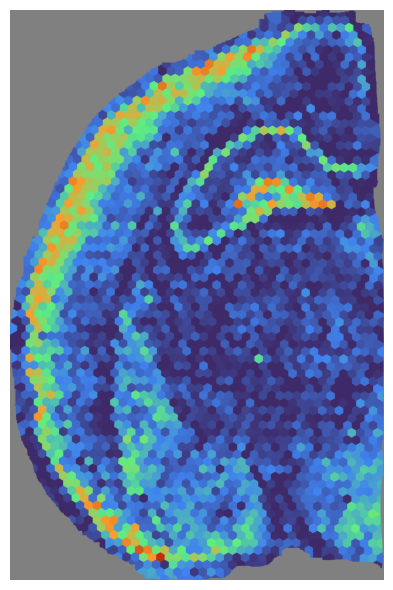

In [10]:
# Visualize the NMF score
mapper.visualize(mouse_cortex, use_score='NMF', index=0)

*** Visualizing and saving the embeddings of GCN... ***


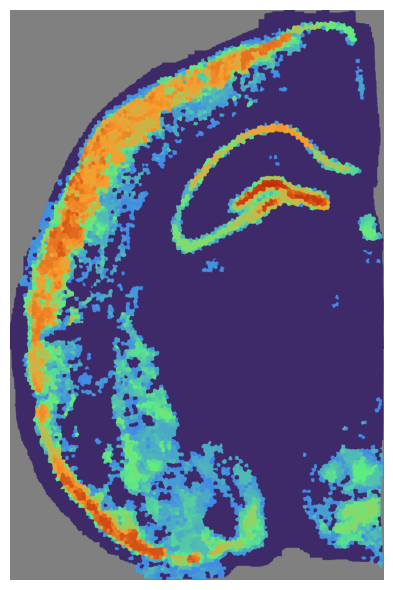

In [11]:
# Visualize the GCN score
mapper.visualize(mouse_cortex, use_score='GCN', index=0)

*** Visualizing and saving the embeddings of SpaHDmap... ***


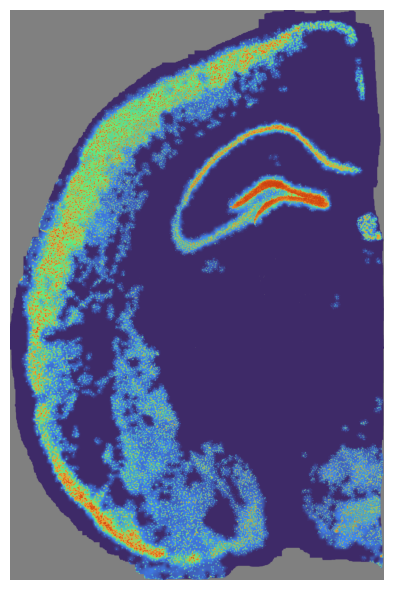

In [12]:
# Visualize the SpaHDmap score
mapper.visualize(mouse_cortex, use_score='SpaHDmap', index=0)

The final metagene matrix is stored in the `metagene` attribute of the Mapper object.

In [13]:
mapper.metagene.head()

,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,Embedding_10,Embedding_11,Embedding_12,Embedding_13,Embedding_14,Embedding_15,Embedding_16,Embedding_17,Embedding_18,Embedding_19,Embedding_20
Ttr,0.250854,1.795319,1.785031,1.019472,0.430990,1.121277,1.558545,10.390684,0.702269,0.434066,5.407087,1.987842,2.439342,0.431632,1.317647,0.071246,1.126989,0.524988,0.658288,0.964933
Pmch,0.000000,0.144549,0.718285,4.478302,0.000000,0.316371,0.240945,0.261848,0.000000,0.113922,0.132109,0.000000,0.079132,0.000000,0.205784,0.000000,0.172660,0.234072,0.224163,0.578589
Nrgn,0.986756,1.410992,1.060034,1.031385,0.000000,3.040890,1.651265,0.287730,0.508896,3.644500,1.401600,0.377710,1.779483,1.520733,2.598135,1.653103,2.925267,2.678256,1.012400,0.318384
Mbp,0.221749,6.516384,3.941922,2.935374,0.823512,1.751629,2.197278,1.508884,0.689872,1.860208,2.871932,3.377632,1.687160,3.271931,2.520380,2.481987,2.357714,1.624391,1.724730,3.722041
Prkcd,0.073243,0.367974,3.681203,0.016423,0.154373,0.292273,0.053025,0.134639,0.049551,0.026198,0.108316,1.184232,0.000000,0.235585,0.000000,0.326060,0.495196,0.037645,0.308362,0.546003


### Refine spatial domain

We can refine the spatial domain by extract spots with high SpaHDmap scores and re-run the SpaHDmap model on these spots.

We take Thalamus region as an example, which is corresponding to the index 2 in the SpaHDmap score.

*** Visualizing and saving the embeddings of SpaHDmap... ***


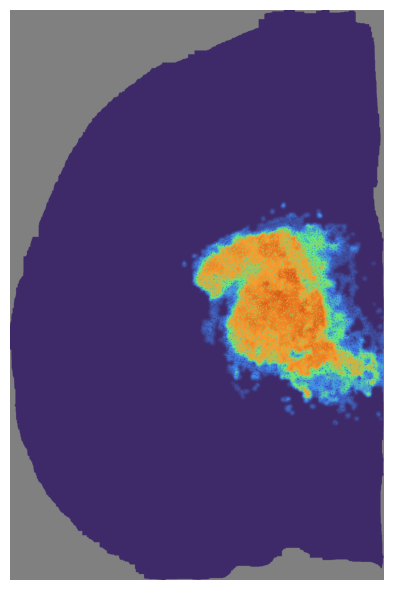

In [14]:
# Visualize the SpaHDmap score
mapper.visualize(mouse_cortex, use_score='SpaHDmap', index=2)

In [15]:
# Extract spots with high SpaHDmap scores
high_score_spots = mapper.extract_spots(index=2, use_score='SpaHDmap_spot', threshold=0.05)

adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
adata_refine = adata[high_score_spots, :]

*** Extracting high-score spots for Embedding_2 in section mouse_cortex... ***
Found 400 spots (out of 2807, 14.25%) above threshold 0.05


/tmp/ipykernel_1562420/2404407283.py:4: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(section_id, include_hires_tiff=True)
/home/qk/anaconda3/lib/python3.11/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [16]:
results_path_refine = f'{root_path}/{project}/Refine_Emb2'

# Re-prepare the data for the refined analysis
mouse_cortex_refine = hdmap.prepare_stdata(adata=adata_refine, section_name='mouse_cortex', image_path=image_path)

*** Reading and preparing AnnData for section mouse_cortex ***
Spot radius found in AnnData: 89
Pre-processing gene expression data for 400 spots and 32285 genes.


/home/qk/projects/DeepFuseNMF/SpaHDmap/data/data_util.py:403: ImplicitModificationWarning: Setting element `.obsm['spatial']` of view, initializing view as actual.
  adata.obsm['spatial'] = adata.obsm['spatial'][:, ::-1]
/home/qk/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Swapping x and y coordinates.
Processing image, seems to be Immunofluorescence image.


We define a function to generate a mask for the refined section, which covers the spots of interest.

In [17]:
def get_mask(section):
    mask = np.zeros_like(section.mask, dtype=np.bool_)
    for (row, col) in section.spot_coord:
        row, col = round(row - section.row_range[0]), round(col - section.col_range[0])
        row_range = np.arange(max(row - 2*section.radius, 0), min(row + 2*section.radius + 1, mask.shape[0]))
        col_range = np.arange(max(col - 2*section.radius, 0), min(col + 2*section.radius + 1, mask.shape[1]))
        mask[np.ix_(row_range, col_range)] = 1

    return mask

mouse_cortex_refine.mask = get_mask(mouse_cortex_refine)

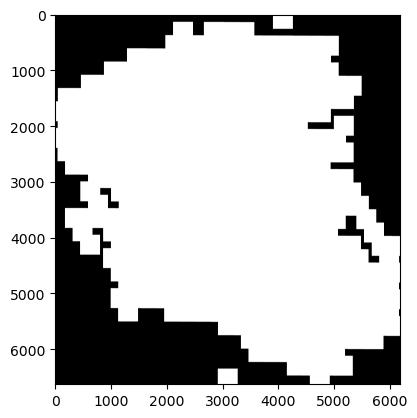

In [18]:
import matplotlib.pyplot as plt
plt.imshow(mouse_cortex_refine.mask*255, cmap='gray')
plt.show()

In [19]:
mapper = hdmap.Mapper(mouse_cortex_refine, results_path=results_path_refine, rank=10, verbose=True)

mapper.run_SpaHDmap()

*** Preparing the tissue splits and creating pseudo spots... ***
*** Single section detected. Using its 10000 genes. ***
*** The split size is set to 256 pixels. ***
For section mouse_cortex, divide the tissue into 765 sub-tissues, and create 2500 pseudo spots.
*** Using GPU ***
Step 1: Run NMF
*** Performing NMF... ***
*** Visualizing and saving the embeddings of NMF... ***
Step 2: Pre-train the SpaHDmap model


/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:520: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:566: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


[Iter: 200 / 5000], Epoch: 9, Loss: 0.022357, Learning rate: 3.984269e-04
[Iter: 400 / 5000], Epoch: 17, Loss: 0.006338, Learning rate: 3.937323e-04
[Iter: 600 / 5000], Epoch: 25, Loss: 0.000421, Learning rate: 3.859904e-04
[Iter: 800 / 5000], Epoch: 34, Loss: 0.000262, Learning rate: 3.753232e-04
[Iter: 1000 / 5000], Epoch: 42, Loss: 0.000170, Learning rate: 3.618989e-04
[Iter: 1200 / 5000], Epoch: 50, Loss: 0.000145, Learning rate: 3.459292e-04
[Iter: 1400 / 5000], Epoch: 59, Loss: 0.000110, Learning rate: 3.276661e-04
[Iter: 1600 / 5000], Epoch: 67, Loss: 0.000091, Learning rate: 3.073974e-04
[Iter: 1800 / 5000], Epoch: 75, Loss: 0.000080, Learning rate: 2.854430e-04
[Iter: 2000 / 5000], Epoch: 84, Loss: 0.000072, Learning rate: 2.621489e-04
[Iter: 2200 / 5000], Epoch: 92, Loss: 0.000062, Learning rate: 2.378826e-04
[Iter: 2400 / 5000], Epoch: 100, Loss: 0.000058, Learning rate: 2.130267e-04
[Iter: 2600 / 5000], Epoch: 109, Loss: 0.000054, Learning rate: 1.879733e-04
[Iter: 2800 / 5

/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:137: RuntimeWarning: invalid value encountered in divide
  tmp_score = score[idx, :, :] if use_score in ['SpaHDmap', 'VD'] else score[idx, :, :] / score[idx, :, :].max()
/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:144: RuntimeWarning: invalid value encountered in cast
  resized_score = cv2.resize(filtered_score.astype(np.uint8),
/home/qk/projects/DeepFuseNMF/SpaHDmap/utils/visualize.py:69: RuntimeWarning: invalid value encountered in cast
  cv2.imwrite(full_path, image_data.astype(np.uint8))


Step 4: Run Voronoi Diagram


/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:929: RuntimeWarning: Mean of empty slice.
  mean_score_input = smooth_input[nonzero_index_input[0], nonzero_index_input[1]].mean()
/home/qk/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:936: RuntimeWarning: Mean of empty slice.
  mean_change = diff_mat1[nonzero_index[0], nonzero_index[1]].mean()
/home/qk/projects/DeepFuseNMF/SpaHDmap/train.py:942: RuntimeWarning: Mean of empty slice.
  mean_score_output = smooth_output[nonzero_index_input[0], nonzero_index_input[1]].mean()


Step 5: Train the SpaHDmap model
*** Training the model... ***
[Iter: 200 / 2000], Epoch: 9,Image Loss: 0.028461, Expression Loss: 0.361698, Total Loss: 0.328571,Learning rate: 4.522638e-03
[Iter: 400 / 2000], Epoch: 17,Image Loss: 0.013537, Expression Loss: 0.360515, Total Loss: 0.326013,Learning rate: 3.272888e-03
[Iter: 600 / 2000], Epoch: 25,Image Loss: 0.011052, Expression Loss: 0.361018, Total Loss: 0.326394,Learning rate: 1.728112e-03
[Iter: 800 / 2000], Epoch: 34,Image Loss: 0.010121, Expression Loss: 0.360827, Total Loss: 0.326098,Learning rate: 4.783620e-04
[Iter: 1000 / 2000], Epoch: 42,Image Loss: 0.009843, Expression Loss: 0.360950, Total Loss: 0.326175,Learning rate: 1.000000e-06
[Iter: 1200 / 2000], Epoch: 50,Image Loss: 0.009283, Expression Loss: 0.360842, Total Loss: 0.326071,Learning rate: 3.642423e-04
[Iter: 1400 / 2000], Epoch: 59,Image Loss: 0.007995, Expression Loss: 0.360636, Total Loss: 0.325682,Learning rate: 2.650259e-04
[Iter: 1600 / 2000], Epoch: 67,Image Lo

Now, we can visualize the refined SpaHDmap scores, where the index 1 corresponds to the Thalamus, sensory-motor cortex related region (DORsm) and index 0 corresponds to the Thalamus, polymodal association cortex related region (DORpm)

*** Visualizing and saving the embeddings of SpaHDmap... ***


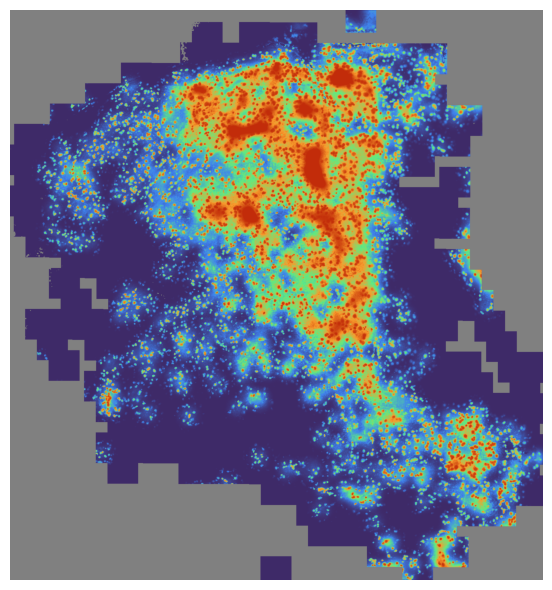

In [20]:
mapper.visualize(mouse_cortex_refine, use_score='SpaHDmap', index=1)

*** Visualizing and saving the embeddings of SpaHDmap... ***


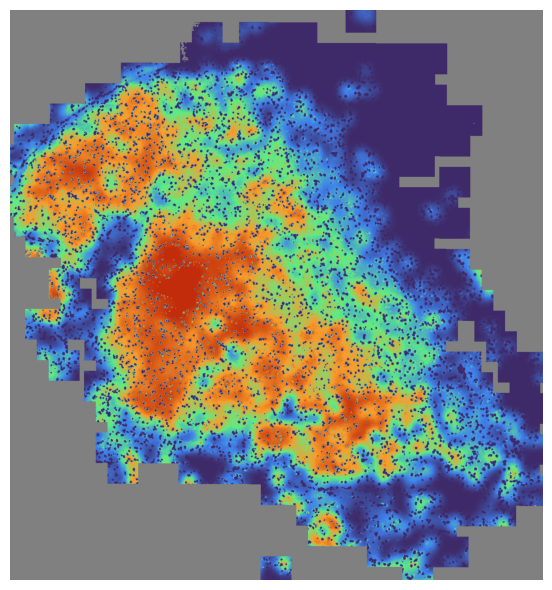

In [22]:
mapper.visualize(mouse_cortex_refine, use_score='SpaHDmap', index=0)